<a href="https://colab.research.google.com/github/DSJibran/Hotel-Booking-EDA-Analysis/blob/main/Hotel_Booking_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>




In [1]:
#Import the main libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [2]:
#Mounting Drive 

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Reading Dataset 

df = pd.read_csv('/content/drive/MyDrive/Datasets/Hotel Bookings.csv')

In [ ]:
#Displays the first five rows of the dataframe

df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
#Checking the shape of the dataframe

df.shape

(119390, 32)

In [5]:
#All the available columns in the dataframe

df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [6]:
#Concise summary of a DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
#Creating a new Kids column with Childern and babaies coulmns

df['kids'] = df['children'] + df['babies']

**We create a new column named 'kids' with the combination of two given columns 'children' and 'babies' for better understanding**

####**Droping Unwanted Coulmns**

In [8]:
#Droping Unwanted Columns

df.drop(['company','children', 'babies', 'agent'], axis = 1, inplace = True)

**We dropped the columns company and agent as they were unnecessary and had huge number of null values**

In [9]:
# Droping duplicate values

df = df.drop_duplicates()

**Here we dropped all the duplicates values from the dataframe**

In [10]:
#Checking final shape of the data frame after some data cleaning

df.shape

(87369, 29)

In [11]:
#Checking null values in the Dataframe

df.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
meal                                0
country                           452
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car_parking_spaces         0
total_of_special_requests           0
reservation_

**We still have some null values in which needs to be dropped from the data set for better result**

In [12]:
#Dropping remaining null values 

df.dropna(inplace = True)

In [13]:
#Final shape of the dataset 

df.shape

(86913, 29)

**After cleaning the data we have 86913 rows and 29 columns**

In [14]:
#Columns after cleaning the dataset

df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'kids'],
      dtype='object')

In [15]:
#Description of the data in the DataFrame

df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,kids
count,86913.000000,86913.000000,86913.000000,86913.000000,86913.000000,86913.000000,86913.000000,86913.000000,86913.000000,86913.000000,86913.000000,86913.000000,86913.000000,86913.000000,86913.000000,86913.000000,86913.000000
mean,0.275943,80.202260,2016.211856,26.841646,15.818301,1.007559,2.628951,1.878603,0.039246,0.030237,0.176763,0.271904,0.753731,106.581162,0.083474,0.699539,0.150058
std,0.446991,86.103281,0.685980,13.654184,8.834477,1.028821,2.043871,0.625884,0.194181,0.369631,1.718149,0.728177,10.043367,54.959822,0.280441,0.831884,0.472662
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,0.000000
25%,0.000000,12.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,72.250000,0.000000,0.000000,0.000000
50%,0.000000,50.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,98.410000,0.000000,0.000000,0.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,134.100000,0.000000,1.000000,0.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,10.000000


##**Ratio of different types of hotels**

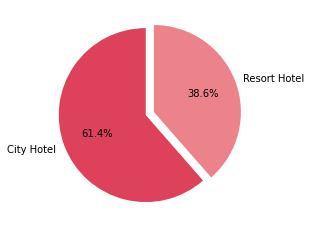

In [17]:
# HOTELS AND RESORT PERCENTAGE

labels = df['hotel'].value_counts().index.tolist()
sizes =df['hotel'].value_counts().tolist()
explode = (0,0.10)
colors = ['#de425b', '#ec838a']
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle =90) ;

In [18]:
#Description of Hotel booked for Adults

df['adults'].groupby(df['hotel']).describe()

,count,mean,std,min,25%,50%,75%,max
hotel,,,,,,,,
City Hotel,53403.0,1.876486,0.544133,0.0,2.0,2.0,2.0,4.0
Resort Hotel,33510.0,1.881976,0.737671,0.0,2.0,2.0,2.0,55.0


In [19]:
#Description of Hotel booked for kids

df['kids'].groupby(df['hotel']).describe()

,count,mean,std,min,25%,50%,75%,max
hotel,,,,,,,,
City Hotel,53403.0,0.139224,0.455788,0.0,0.0,0.0,0.0,10.0
Resort Hotel,33510.0,0.167323,0.497894,0.0,0.0,0.0,0.0,10.0


**We can see by the above pie chart, that mojority of the people preferred city hotel over resort hotel. Further we can clearly see the mean value of adults and children are higher in case of resort hotel, hence they are a better choice for larger families**

##**How many bookings made by each hotel yearly?**

Text(0.5, 1.0, 'Graph showing yearly arrival')

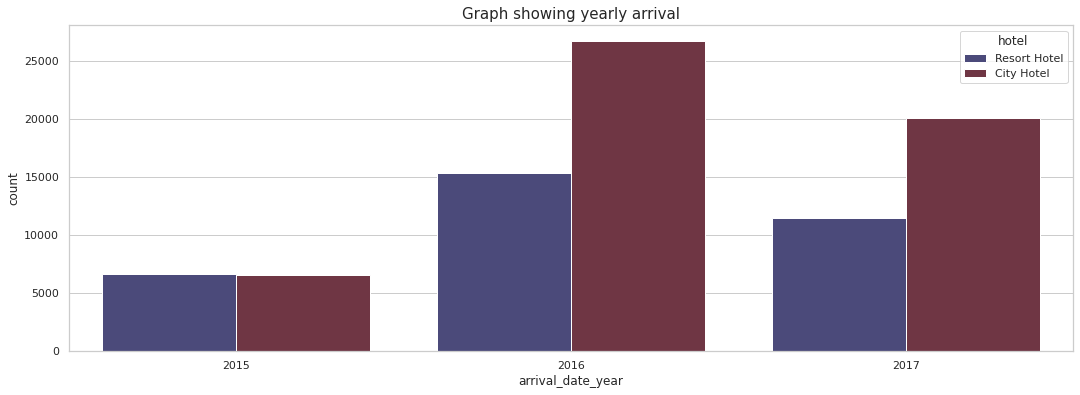

In [23]:
plt.figure(figsize=(18,6))
sns.set(style = "whitegrid")

sns.countplot(data = df, x = 'arrival_date_year', hue = 'hotel' , palette='icefire').set_title('Graph showing yearly arrival', fontsize =15)

**We can see that 2016 seems to be the year where hotel booking is at its highest.**


##**How many bookings made by each hotel every month and Which is the Busiest month?**

Text(0, 0.5, 'Count')

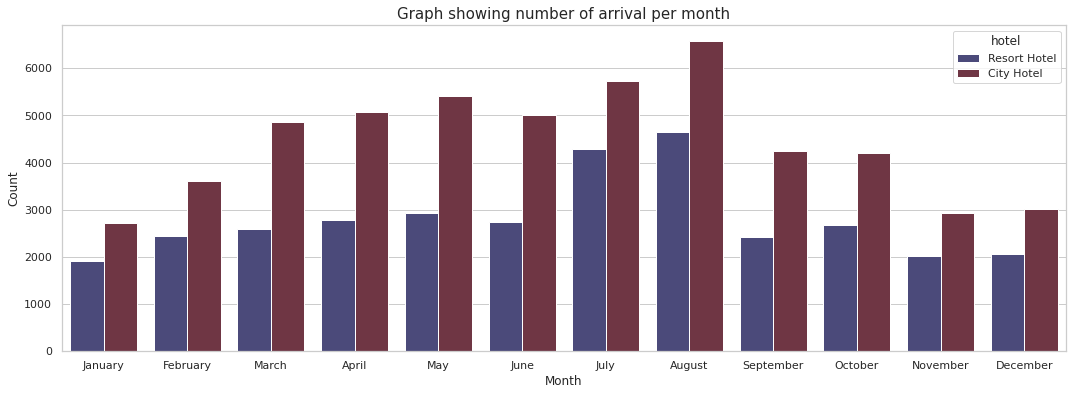

In [22]:
#Number of arrivals per months

plt.figure(figsize=(18,6))

sns.countplot(data = df, x = 'arrival_date_month', hue = 'hotel', palette='icefire' ,order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December']).set_title('Graph showing number of arrival per month',fontsize=15)
plt.xlabel('Month')
plt.ylabel('Count')

In [24]:
#August's month total booking for City Hotel

city_hotel_august = df.loc[(df['hotel']=="City Hotel") & (df['arrival_date_month']== 'August')].hotel.value_counts()
print(city_hotel_august)

# August's month total booking for Resort Hotel

resort_hotel_august = df.loc[(df['hotel']=="Resort Hotel") & (df['arrival_date_month']== 'August')].hotel.value_counts()
print(resort_hotel_august)

City Hotel    6586
Name: hotel, dtype: int64
Resort Hotel    4643
Name: hotel, dtype: int64


**We can see an increasing trend in booking around the middle of the year, with August being the busiest with 6586 city hotel occupancy and 4643 resort hotel occupancy.**

##**At which period of the month hotels demands are less?**

Text(0.5, 1.0, 'Graph showing number of arrival per day')

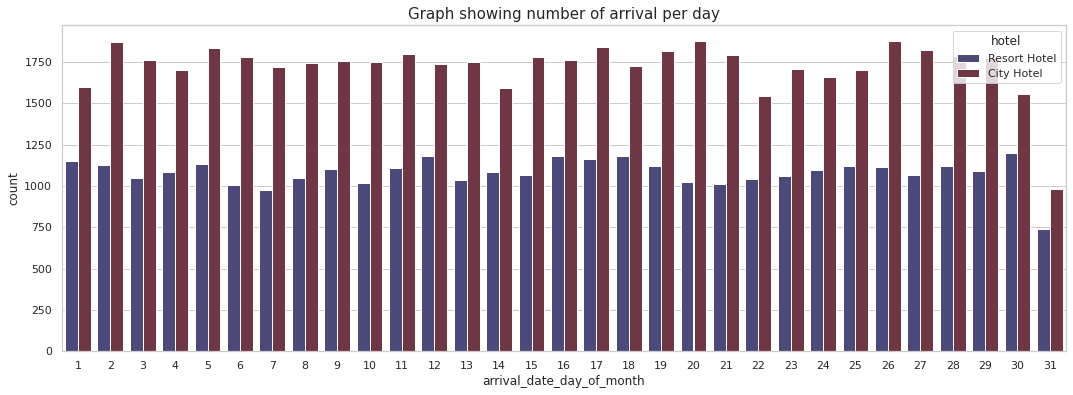

In [25]:
# Number of arrivals per day 
plt.figure(figsize=(18,6))

sns.countplot(data = df, x = 'arrival_date_day_of_month',hue='hotel',  palette='icefire').set_title('Graph showing number of arrival per day',fontsize=15) 

**We can see that month ending has the least number of arrivals**

##**How often people Cancel their bookings?**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


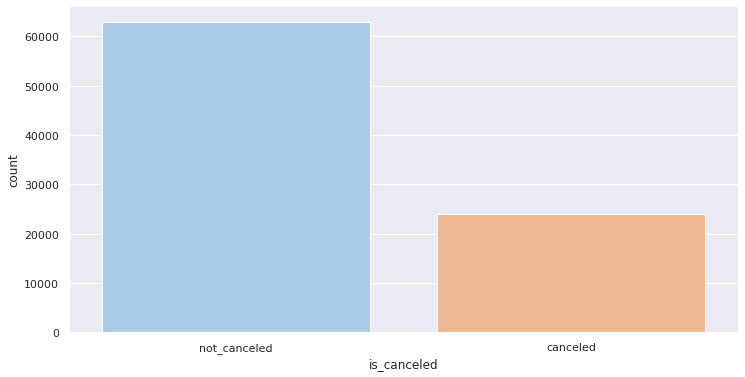

In [26]:
#cancel booking 
plt.figure(figsize=(12,6))
df['is_canceled'] = df.is_canceled.replace([1,0], ['canceled', 'not_canceled'])
canceled_data =df['is_canceled']
sns.set(style = "darkgrid")
sns.countplot(canceled_data, palette= 'pastel');

**Majority(2/3rd's) of the hotel bookings are not canceled**

##**Which type of hotel usually face more cancellation than other?**

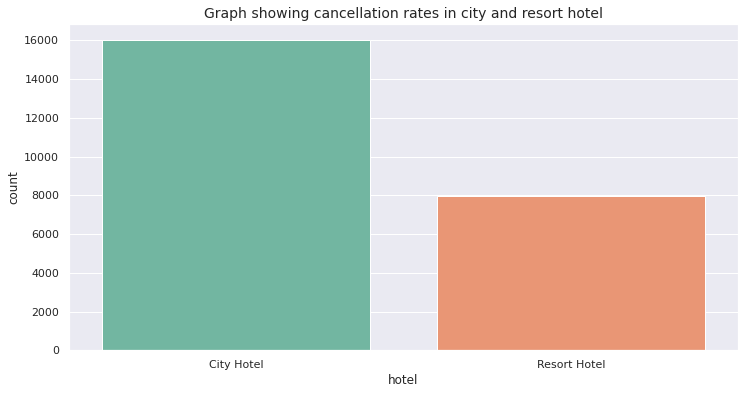

In [27]:
#Let's look into cancellation rate among different type of hotel.
plt.figure(figsize=(12,6))
lst1 = ['is_canceled', 'hotel']
type_of_hotel_canceled = df[lst1]
canceled_hotel = type_of_hotel_canceled[type_of_hotel_canceled['is_canceled'] == 'canceled'].groupby(['hotel']).size().reset_index(name = 'count')
sns.set(style = "darkgrid")
sns.barplot(data = canceled_hotel, x = 'hotel', y = 'count', palette = 'Set2').set_title('Graph showing cancellation rates in city and resort hotel', fontsize = 14);


**City hotels have the highest cancellation rates, this can be verified by the fact that city hotels have higher booking rate than resort hotels**

##**Which country's visitors didn't cancelled their bookings?**

In [ ]:
#country visitors with no cancellation

country_visitors = df[df['is_canceled'] == 'not_canceled'].groupby(['country']).size().reset_index(name = 'count')

#We will be using Plotly.express to plot a choropleth map

px.choropleth(country_visitors, locations = "country", color= "count", hover_name= "country",
              color_continuous_scale=px.colors.sequential.Greens, 
              title="Home country of visitors")

**Visitors from Portugal, Spain, Franch and UK didn't cancel their bookings**

##**How many guest requested for Car parking ?**

Text(0.5, 1.0, 'Graph showing guests require Car Parking')

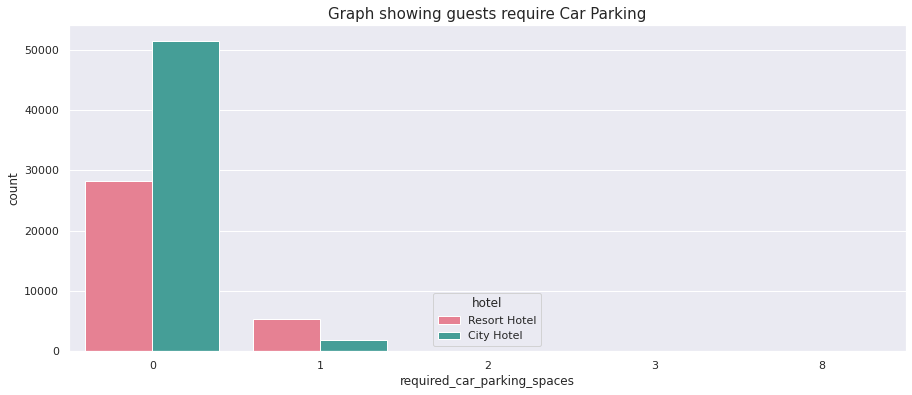

In [29]:
#guest requiring car parking 

plt.figure(figsize=(15,6))

sns.countplot(data = df, x = 'required_car_parking_spaces',hue='hotel', palette='husl').set_title('Graph showing guests require Car Parking',fontsize=15) 

In [30]:
#Guest count requested for parking

df.required_car_parking_spaces.value_counts()

0    79706
1     7174
2       28
3        3
8        2
Name: required_car_parking_spaces, dtype: int64

**It is clear that the majority of guests do not require car parking in any hotel type**

##**Which distribution channel gave most of the bookings?**

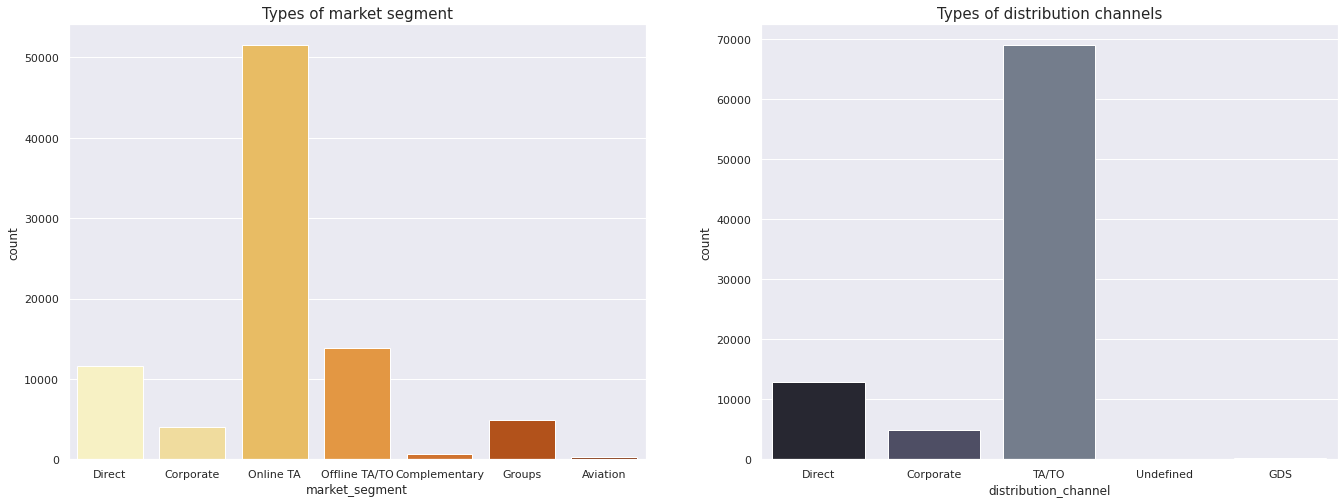

In [31]:
#Looking into market segments and distribution channel

plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.countplot(x='market_segment', data=df, palette="YlOrBr")
plt.title('Types of market segment', size=15)

plt.subplot(1, 2, 2)
sns.countplot(data = df, x = 'distribution_channel',  palette="bone")
plt.title('Types of distribution channels', size=15)
plt.subplots_adjust(right=1.3)

**Majority of the bookings were made through online travel agent and the travel agents whether online/offline have the highest distribution rates**

##**Which is the most preffered hotel type as per business segment?**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


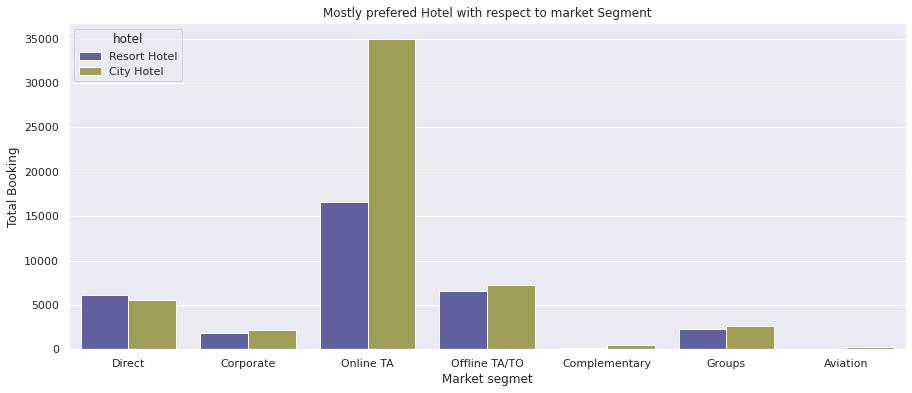

In [32]:
# This is a Count plot for finding most prefered market segment 
plt.figure(figsize=(15, 6))
sns.countplot(df.market_segment,hue= df.hotel, palette = 'gist_stern').set(title = 'Mostly prefered Hotel with respect to market Segment', xlabel = 'Market segmet' , ylabel ='Total Booking');

In [33]:
# Total booking done by Online TA

df.loc[df['market_segment']=='Online TA'].hotel.value_counts()

City Hotel      34984
Resort Hotel    16549
Name: hotel, dtype: int64

**For both type of hotel, customer prefer 'online TA' segment for booking. City hotel got 34984 Online TA booking while Resort hotel got 16549**

##**Did Hotels asked for deposits for bookings?**

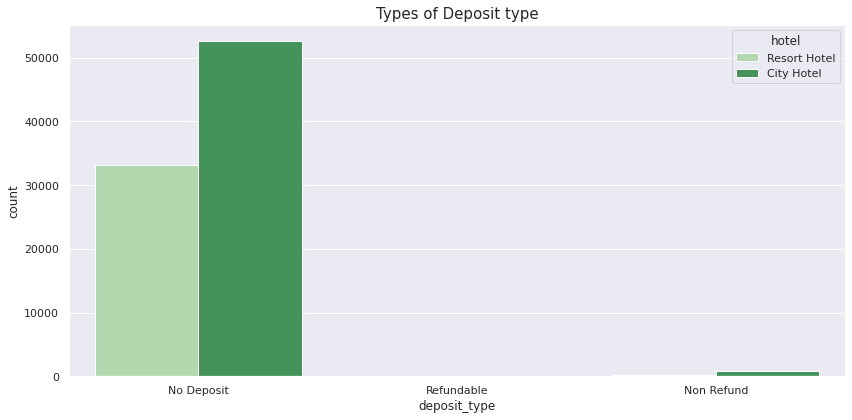

In [34]:
#Deposit for Both hotel types

plt.figure(figsize=(12, 6))

sns.countplot(data = df, x = 'deposit_type',hue='hotel', palette='Greens')
plt.title('Types of Deposit type', size=15)
plt.tight_layout()

**Majority of the booking does not require deposit. That could explain why cancellation rate was actually 50% of non-cancellation rate.**

##**Is deposit type and cancellation have any pattern?**

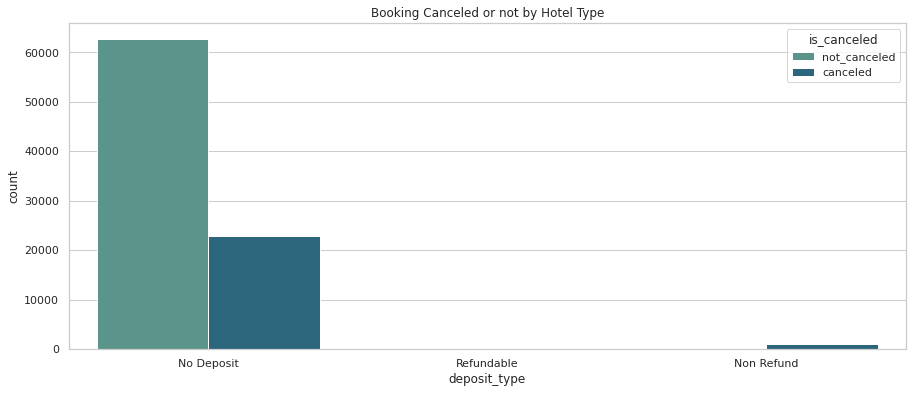

In [35]:
#What is the relationship between deposit type and cancellation?

plt.figure(figsize=(15, 6))
sns.set(style = "whitegrid")
plt.title("Booking Canceled or not by Hotel Type")
ax = sns.countplot(x = "deposit_type", hue = 'is_canceled', data = df, palette = 'crest')

**Guests who did not pay a deposit cancelled around a quarter of all bookings. If the hotels were unable to replace the cancelled reservations in a timely manner, these figures would be enormous. As a result, guests who do not pay a deposit while making a reservation are more likely to cancel their bookings. It's also worth noting that non-refundable deposits were cancelled at a higher rate than refundable deposits. Refundable deposits would seem to have more cancellations, as hotel rates are often higher for these types of rooms, and clients pay more in anticipation of cancellation.**

##**Which country's guest have high number of bookings ?**

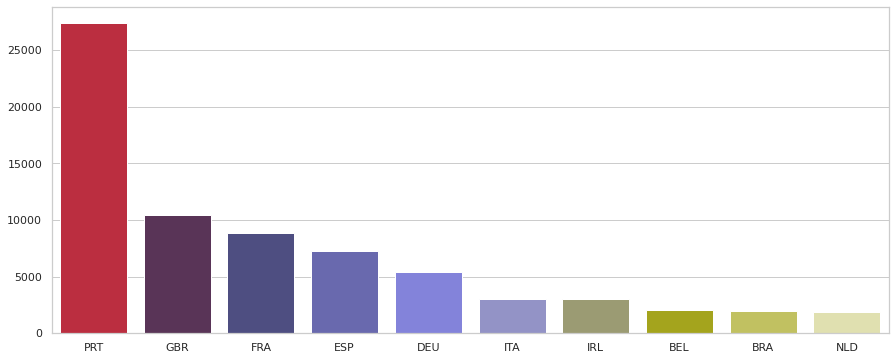

In [37]:
# From where the most guests are coming 

plt.figure(figsize=(15, 6))
sns.barplot (y= list(df.country.value_counts().head (10)), x= list(df.country.value_counts().head(10).index), palette = 'gist_stern')


**Western Europe has the most visitors, with Portugal, France, the United Kingdom, and Spain topping the list.** 

**These countries should be targetted for promotion**

##**Which months have highest and lowest booking rates?**

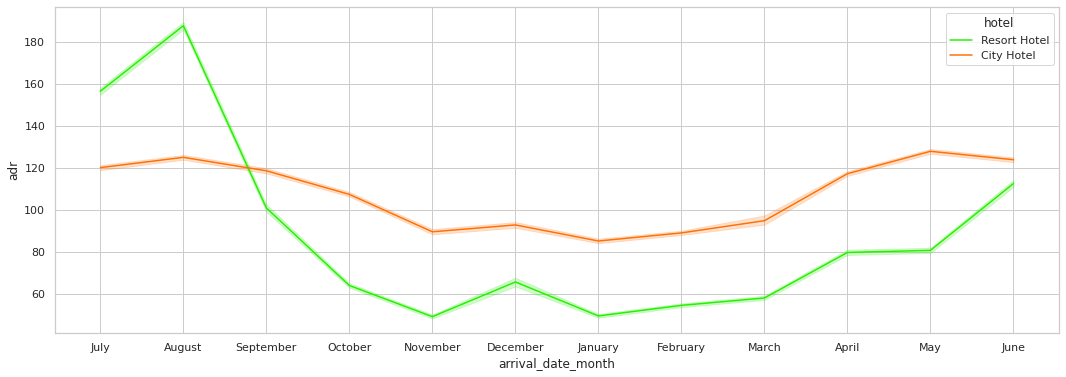

In [39]:
#cheaper and expansive booking rates

plt.figure(figsize=(18,6))
sns.lineplot(x='arrival_date_month', y='adr', hue='hotel', data= df, palette = 'gist_ncar')

**From the graph, we can deduce both city and resort hotels are lowest from November to January, and greatest from August**.

##**What is the average cost of a person staying in each type of hotel?**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


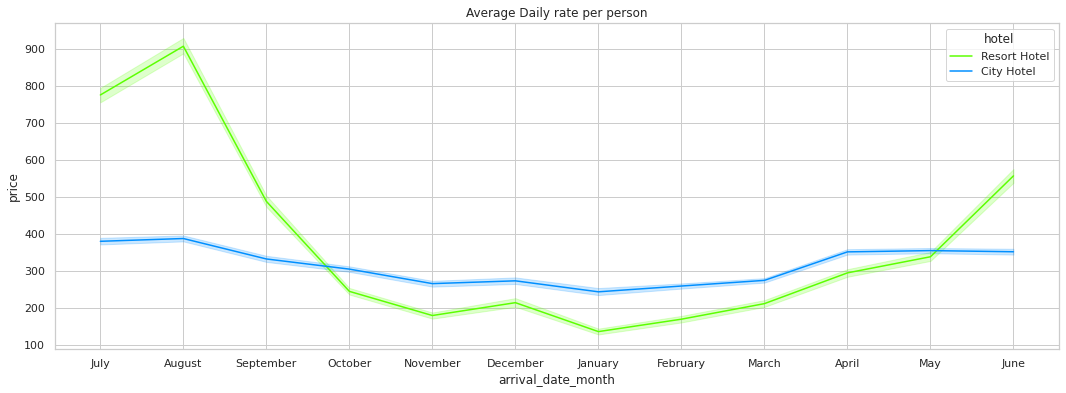

In [40]:
# Calculating average daily rate per person
plt.figure(figsize=(18,6))


df['adr_pp'] = df['adr'] / (df['adults'] + df['kids']) 
actual_guests = df.loc[df["is_canceled"] == 'not_canceled']
actual_guests['price'] = actual_guests['adr'] * (actual_guests['stays_in_weekend_nights'] + actual_guests['stays_in_week_nights'])

sns.lineplot(data = actual_guests, x = 'arrival_date_month', y = 'price', hue = 'hotel',palette = 'gist_rainbow').set(title= 'Average Daily rate per person');

**Resort hotel rates are significantly higher. In addition, the prices of city hotels do not fluctuate significantly**.

##**Whether guest preferred to stay over a weekend or weekday?**

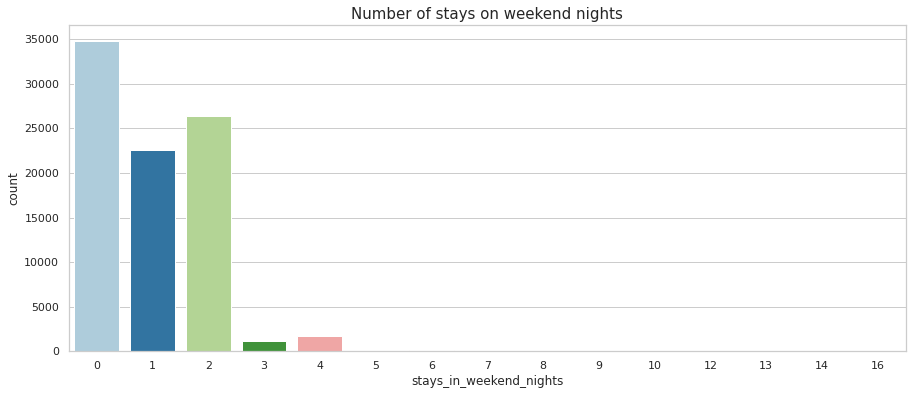

In [41]:
#Stay in Weekend nights

plt.figure(figsize=(15, 6))
sns.countplot(data = df, x = 'stays_in_weekend_nights', palette = 'Paired').set_title('Number of stays on weekend nights', fontsize = 15);

Text(0.5, 1.0, 'Number of stays on weekday night')

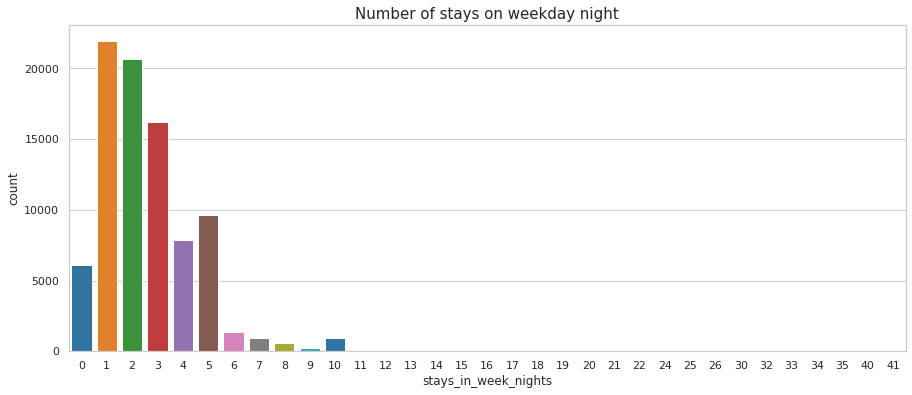

In [42]:
#Stay in Weekdays nights

plt.figure(figsize=(15, 6))
sns.countplot(data = df, x = 'stays_in_week_nights' , palette = 'tab10').set_title('Number of stays on weekday night' , fontsize = 15)

**The majority of the stays appear to be on weekday nights. As a result, whatever we observed for the chart on the day of the month appears to be random.**

##**Does people with children have a particular preference for the type of hotel?**

Text(0.5, 1.0, 'Number of kids')

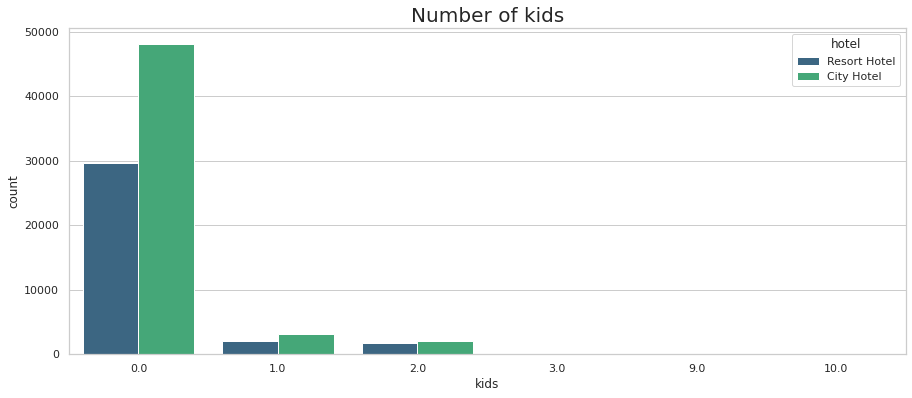

In [43]:
# Does people with children have a particular preference for the type of hotel?

plt.figure(figsize=(15, 6))
sns.countplot(data = df, x = 'kids', hue = 'hotel', palette = 'viridis').set_title("Number of kids", fontsize = 20)

**Families with Kids have no particular preference for the hotel types**